# Chapter 2: Your First Learning Program

Paolo Perrotta, Programming Machine Learning: From Coding to Deep Learning (2020)

## Pizza and Correlation

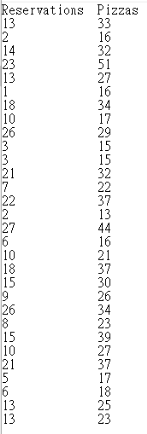

In [1]:
import numpy as np
X, Y = np.loadtxt("pizza.txt", skiprows=1, unpack=True)

In [2]:
print(f'X.shape={X.shape}, Y.shape={Y.shape}')

X.shape=(30,), Y.shape=(30,)


In [3]:
print(X[0:5], Y[0:5])

[13.  2. 14. 23. 13.] [33. 16. 32. 51. 27.]


In [4]:
X

array([13.,  2., 14., 23., 13.,  1., 18., 10., 26.,  3.,  3., 21.,  7.,
       22.,  2., 27.,  6., 10., 18., 15.,  9., 26.,  8., 15., 10., 21.,
        5.,  6., 13., 13.])

In [5]:
Y

array([33., 16., 32., 51., 27., 16., 34., 17., 29., 15., 15., 32., 22.,
       37., 13., 44., 16., 21., 37., 30., 26., 34., 23., 39., 27., 37.,
       17., 18., 25., 23.])

In [6]:
# Show matplot charts inside this Jupyter Notebook
#%matplotlib inline

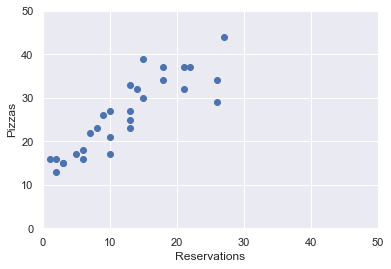

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.plot(X, Y, "bo")
plt.xlabel("Reservations")
plt.ylabel("Pizzas")
x_edge, y_edge = 50, 50
plt.axis([0, x_edge, 0, y_edge])
plt.show()

## Tracing a Line

In [8]:
def predict(X, w):
    return X * w

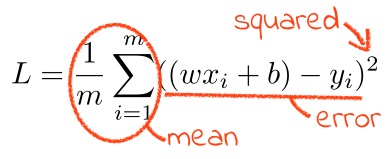

In [9]:
w = 1
print(X*w-Y)
print('\n')
print('Shape of X*w-Y',(X*w-Y).shape)
print('\n')
print((X*w-Y)**2)
print('\n')
print(np.average((X*w-Y)**2))

[-20. -14. -18. -28. -14. -15. -16.  -7.  -3. -12. -12. -11. -15. -15.
 -11. -17. -10. -11. -19. -15. -17.  -8. -15. -24. -17. -16. -12. -12.
 -12. -10.]


Shape of X*w-Y (30,)


[400. 196. 324. 784. 196. 225. 256.  49.   9. 144. 144. 121. 225. 225.
 121. 289. 100. 121. 361. 225. 289.  64. 225. 576. 289. 256. 144. 144.
 144. 100.]


224.86666666666667


In [10]:
def loss(X, Y, w):
    return np.average((predict(X, w) - Y) ** 2)

losses are 1838.47


length of losses is 200


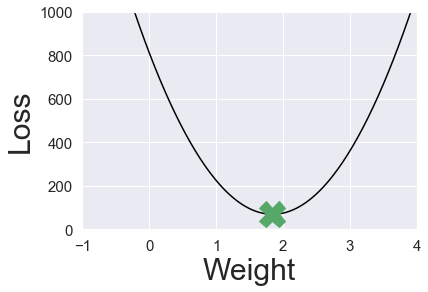

In [11]:
# Plot loss
# Compute losses for w ranging from -1 to 4
weights = np.linspace(-1.0, 4.0, 200)
losses = [loss(X, Y, w) for w in weights]

print(f'losses are {losses[0]:.2f}')
print('\n')
print('length of losses is',len(losses))

# Plot weights and losses
plt.axis([-1, 4, 0, 1000])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Weight", fontsize=30)
plt.ylabel("Loss", fontsize=30)
plt.plot(weights, losses, color="black")

# Put a green cross on the minimum loss
min_index = np.argmin(losses)
plt.plot(weights[min_index], losses[min_index], "gX", markersize=26)

plt.show()

In [12]:
def train(X, Y, iterations, lr):
    w = 0
    for i in range(iterations):
        current_loss = loss(X, Y, w)
        print("Iteration %4d => Loss: %.6f" % (i, current_loss))

        if loss(X, Y, w + lr) < current_loss:
            w += lr
        elif loss(X, Y, w - lr) < current_loss:
            w -= lr
        else:
            return w

    raise Exception("Couldn't converge within %d iterations" % iterations)

In [13]:
w = train(X, Y, iterations=10000, lr=0.01)
print("\nw=%.3f" % w)
print("Prediction: x=%d => y=%.2f" % (20, predict(20, w)))

Iteration    0 => Loss: 812.866667
Iteration    1 => Loss: 804.820547
Iteration    2 => Loss: 796.818187
Iteration    3 => Loss: 788.859587
Iteration    4 => Loss: 780.944747
Iteration    5 => Loss: 773.073667
Iteration    6 => Loss: 765.246347
Iteration    7 => Loss: 757.462787
Iteration    8 => Loss: 749.722987
Iteration    9 => Loss: 742.026947
Iteration   10 => Loss: 734.374667
Iteration   11 => Loss: 726.766147
Iteration   12 => Loss: 719.201387
Iteration   13 => Loss: 711.680387
Iteration   14 => Loss: 704.203147
Iteration   15 => Loss: 696.769667
Iteration   16 => Loss: 689.379947
Iteration   17 => Loss: 682.033987
Iteration   18 => Loss: 674.731787
Iteration   19 => Loss: 667.473347
Iteration   20 => Loss: 660.258667
Iteration   21 => Loss: 653.087747
Iteration   22 => Loss: 645.960587
Iteration   23 => Loss: 638.877187
Iteration   24 => Loss: 631.837547
Iteration   25 => Loss: 624.841667
Iteration   26 => Loss: 617.889547
Iteration   27 => Loss: 610.981187
Iteration   28 => Lo

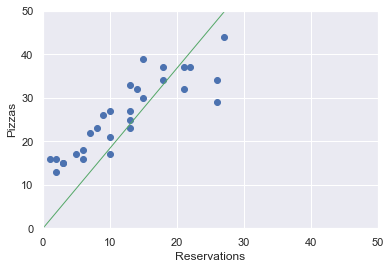

In [14]:
plt.plot(X, Y, "bo")
plt.xlabel("Reservations")
plt.ylabel("Pizzas")
x_edge, y_edge = 50, 50
plt.axis([0, x_edge, 0, y_edge])
plt.plot([0, x_edge], [0, predict(x_edge, w)], linewidth=1.0, color="g")
# plt.ion()
plt.show()

## Adding a Bias

In [15]:
def predict(X, w, b):
    return X * w + b

def loss(X, Y, w, b):
    return np.average((predict(X, w, b) - Y) ** 2)

def train(X, Y, iterations, lr):
    w = b = 0
    for i in range(iterations):
        current_loss = loss(X, Y, w, b)
        if i % 100 == 0:
              print(f'Iteration {i:4d} => Loss: {current_loss:.3f}')
        
        if loss(X, Y, w + lr, b) < current_loss:
            w += lr
        elif loss(X, Y, w - lr, b) < current_loss:
            w -= lr
        elif loss(X, Y, w, b + lr) < current_loss:
            b += lr
        elif loss(X, Y, w, b - lr) < current_loss:
            b -= lr
        else:
            return w, b

    raise Exception("Couldn't converge within %d iterations" % iterations)

In [16]:
w, b = train(X, Y, iterations=10000, lr=0.01)
print("\nw=%.3f, b=%.3f" % (w, b))
print("Prediction: x=%d => y=%.2f" % (20, predict(20, w, b)))

Iteration    0 => Loss: 812.867
Iteration  100 => Loss: 224.867
Iteration  200 => Loss: 68.010
Iteration  300 => Loss: 61.715
Iteration  400 => Loss: 55.843
Iteration  500 => Loss: 50.496
Iteration  600 => Loss: 45.581
Iteration  700 => Loss: 41.184
Iteration  800 => Loss: 37.225
Iteration  900 => Loss: 33.777
Iteration 1000 => Loss: 30.774
Iteration 1100 => Loss: 28.275
Iteration 1200 => Loss: 26.229
Iteration 1300 => Loss: 24.679
Iteration 1400 => Loss: 23.590
Iteration 1500 => Loss: 22.989

w=1.100, b=12.930
Prediction: x=20 => y=34.93


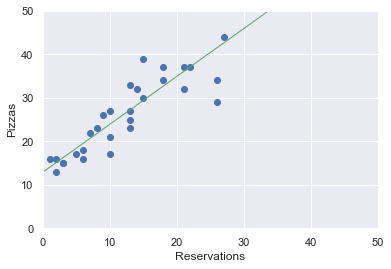

In [17]:
plt.plot(X, Y, "bo")
plt.xlabel("Reservations")
plt.ylabel("Pizzas")
x_edge, y_edge = 50, 50
plt.axis([0, x_edge, 0, y_edge])
plt.plot([0, x_edge], [b, predict(x_edge, w, b)], linewidth=1.0, color="g")
# plt.ion()
plt.show()